In [ ]:
pip install xarray scipy

# IMPORTS

Importing something here

In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.basemap import Basemap
import PIL
import imageio
from scipy.interpolate import griddata

# Data exploration

In [5]:
data = Dataset("CA_GFS_0p25_f000_2017-2023.nc")
data2 = Dataset("CA_GFS_0p25_f000_CW_2017-2023.nc")

In [6]:
data.variables.keys()
data2.variables.keys()

dict_keys(['time', 'cw', 'lat', 'lon'])

In [9]:
data.variables['lon']
data.variables['tk2']
data2.variables['cw']

<class 'netCDF4._netCDF4.Variable'>
float32 cw(time, lat, lon)
    _FillValue: nan
    long_name: Cloud water @ Entire atmosphere layer
    units: kg.m-2
    abbreviation: CWAT
    grid_mapping: LatLon_Projection
    coordinates: reftime lat lon 
    Grib_Variable_Id: VAR_0-6-6_L200
    Grib2_Parameter: [0 6 6]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Cloud
    Grib2_Parameter_Name: Cloud water
    Grib2_Level_Type: 200
    Grib2_Level_Desc: Entire atmosphere layer
    Grib2_Generating_Process_Type: Forecast
    Grib2_Statistical_Process_Type: UnknownStatType--1
    cell_methods: time: mean
    missing_value: nan
unlimited dimensions: time
current shape = (10224, 57, 65)
filling on

# Regrid netCDF files into 0.01 deg

# Create plots

In [66]:
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
time = data.variables['time'][:]
tave = data.variables['tk2'][:]



masked_array(data=[    0,     6,    12, ..., 61326, 61332, 61338],
             mask=False,
       fill_value=999999)

In [32]:
min_lat = np.min(lats)
min_lon = np.min(lons)
max_lat = np.max(lats)
max_lon = np.max(lons)

min_time = np.min(time)
max_time = np.max(time)

min_temp = np.min(tave)
max_temp = np.max(tave)

print(f"Minimum Latitude: {min_lat}")
print(f"Minimum Longitude: {min_lon}")
print(f"Maximum Latitude: {max_lat}")
print(f"Maximum Longitude: {max_lon}")

print(f"Minimum Time: {min_time}")
print(f"Maximum Time: {max_time}")

print(f"Minimum Temp: {min_temp}")
print(f"Maximum Temp: {max_temp}")

Minimum Latitude: 32.0
Minimum Longitude: 232.0
Maximum Latitude: 46.0
Maximum Longitude: 248.0
Minimum Time: 0
Maximum Time: 61338
Minimum Temp: 229.47000122070312
Maximum Temp: 322.20001220703125


In [71]:
mp = Basemap(projection = 'merc', 
             llcrnrlon = 232, 
             llcrnrlat = 32, 
             urcrnrlon = 248, 
             urcrnrlat = 46,
             resolution = 'i')

lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

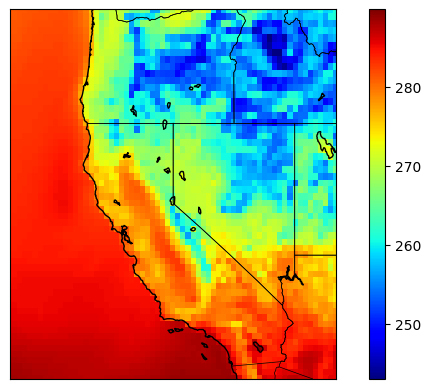

In [73]:
c_scheme = mp.pcolor(x, y, np.squeeze(tave[0,:,:]), cmap = 'jet')
#inside it is time, lat, lon, choosing time zero

c_bar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

In [60]:
days = np.arange(0, 100)

for i in days:
    c_scheme = mp.pcolor(x, y, np.squeeze(tave[i,:,:]), cmap = 'jet')
    #inside it is time, lat, lon, choosing time zero

    c_bar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()

    actualday = i+1
    plt.title('Average Temperature: Day ' + str(actualday))
    plt.clim(229, 323)
    plt.savefig(f'/Users/nathanchen/Documents/JIFRESSE/images/{actualday}.jpg', dpi = 300, bbox_inches = 'tight')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [59]:
#generate a GIF file from the images
image_frames = []

days2 = np.arange(1, 101)

# Define the directory where your images are stored
image_dir = '/Users/nathanchen/Documents/JIFRESSE/images/'

# Generate the list of image filenames
image_filenames = [f'{image_dir}{i}.jpg' for i in range(1, 101)]

# Load images
with imageio.get_writer('temperature_timelapse2.gif', mode='I', duration=0.1) as writer:
    for filename in image_filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

/var/folders/vc/z6j_dxbj4wl_jhtyr4jzsbw40000gn/T/ipykernel_21452/1703757722.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [4]:
data = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/data/CA_GFS_0p25_f012_2017-2023.nc")
data

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 10224, lat: 57, lon: 65)
Coordinates:
  * time     (time) datetime64[ns] 82kB 2016-12-31T12:00:00 ... 2023-12-31T06...
  * lat      (lat) float32 228B 46.0 45.75 45.5 45.25 ... 32.75 32.5 32.25 32.0
  * lon      (lon) float32 260B 232.0 232.2 232.5 232.8 ... 247.5 247.8 248.0
Data variables: (12/14)
    pwv      (time, lat, lon) float32 152MB ...
    cw       (time, lat, lon) float32 152MB ...
    tk2      (time, lat, lon) float32 152MB ...
    qv2      (time, lat, lon) float32 152MB ...
    u10      (time, lat, lon) float32 152MB ...
    v10      (time, lat, lon) float32 152MB ...
    ...       ...
    ps       (time, lat, lon) float32 152MB ...
    pr       (time, lat, lon) float32 152MB ...
    cfr      (time, lat, lon) float32 152MB ...
    dbz      (time, lat, lon) float32 152MB ...
    u700     (time, lat, lon) float32 152MB ...
    v700     (time, lat, lon) float32 152MB ...

In [5]:
data = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/data/MERRA2_6hrly.AODANA.2017-2023.nc")

In [6]:
lons = data['lon'].values
lats = data['lat'].values

min_lon, max_lon = min(lons), max(lons)
min_lat, max_lat = min(lats), max(lats)

print(min_lon, ',',max_lon, ',',min_lat, ',',max_lat)


-127.5 , -112.5 , 32.0 , 46.0


In [8]:
data

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 10224, lat: 57, lon: 65)
Coordinates:
  * time     (time) datetime64[ns] 82kB 2016-12-31T12:00:00 ... 2023-12-31T06...
  * lat      (lat) float32 228B 46.0 45.75 45.5 45.25 ... 32.75 32.5 32.25 32.0
  * lon      (lon) float32 260B 232.0 232.2 232.5 232.8 ... 247.5 247.8 248.0
Data variables: (12/14)
    pwv      (time, lat, lon) float32 152MB ...
    cw       (time, lat, lon) float32 152MB ...
    tk2      (time, lat, lon) float32 152MB ...
    qv2      (time, lat, lon) float32 152MB ...
    u10      (time, lat, lon) float32 152MB ...
    v10      (time, lat, lon) float32 152MB ...
    ...       ...
    ps       (time, lat, lon) float32 152MB ...
    pr       (time, lat, lon) float32 152MB ...
    cfr      (time, lat, lon) float32 152MB ...
    dbz      (time, lat, lon) float32 152MB ...
    u700     (time, lat, lon) float32 152MB ...
    v700     (time, lat, lon) float32 152MB ...

In [17]:
data = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/data/CA_GFS_0p25_f000_CW_2017-2023.nc")
data

<xarray.Dataset> Size: 152MB
Dimensions:  (time: 10224, lat: 57, lon: 65)
Coordinates:
  * time     (time) datetime64[ns] 82kB 2016-12-31T12:00:00 ... 2023-12-31T06...
  * lat      (lat) float32 228B 46.0 45.75 45.5 45.25 ... 32.75 32.5 32.25 32.0
  * lon      (lon) float32 260B 232.0 232.2 232.5 232.8 ... 247.5 247.8 248.0
Data variables:
    cw       (time, lat, lon) float32 152MB ...
Attributes:
    history:  Tue Jul  2 17:35:46 2024: ncrcat modified_CA_GFS_0p25_f000_CW_2...
    NCO:      netCDF Operators version 5.1.4 (Homepage = http://nco.sf.net, C...

In [23]:
data = xr.open_dataset("/Users/nathanchen/Documents/JIFRESSE/data/MERRA2_6hrly.SO4.2017-2023.nc")
data

<xarray.Dataset> Size: 30MB
Dimensions:  (time: 10224, lon: 25, lat: 29)
Coordinates:
  * time     (time) datetime64[ns] 82kB 2016-12-31T12:00:00 ... 2023-12-31T06...
  * lon      (lon) float64 200B -127.5 -126.9 -126.2 ... -113.8 -113.1 -112.5
  * lat      (lat) float64 232B 32.0 32.5 33.0 33.5 34.0 ... 44.5 45.0 45.5 46.0
    lev      float64 8B ...
Data variables:
    SO4      (time, lat, lon) float32 30MB ...